In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

import model_based_agent as mba
import tab_agents as tab

In [2]:
'''
At the end of this script, there will be files in a timestamped folder:
1. Saved trajectory combined with old ('..total.pkl')
2. Saved individual trajectory files ('..eval_start.pkl', '..[ep].pkl')
3. Averaged agent from each each full worm episode ('..[ep]_agent.pkl')

In folder from 12_01_dropoutmodel/Data:
18-12-13-31 was a failed debugging trial
18-12-13-49 empty plate debugging trial
18-12-15-00 worm run from nogap_traj_df.pkl
18-12-16-39 continuation of 15-00 above

In folder 12_19_realworms/Data:
First three are trials; last three are init collection
19-12-18-26 test run w 50-step eps
19-12-18-40 ''
19-12-18-50 ''
20-12-14-25
20-12-14-28
20-12-14-58
'''
fbase0 = './../12_01_dropoutmodel/Data/'
fbase1 = './../12_19_realworms/Data/'


In [3]:
trial = 'Reals18-12-15-00/realworm_'
with open(fbase0+trial+'total_params.pkl','rb') as f:
    pars = pickle.load(f)
with open(fbase0+trial+'1_agent.pkl','rb') as f:
    agt0 = pickle.load(f)
with open(fbase0+trial+'5_agent.pkl','rb') as f:
    agt1 = pickle.load(f)
with open(fbase0+trial+'5.pkl','rb') as f:
    traj = pickle.load(f)

In [73]:
print(len(traj['reward']))
print(pars)

1200
{'reward_ahead': 10, 'timestep_gap': 1, 'prev_act_window': 3, 'jump_limit': 100}


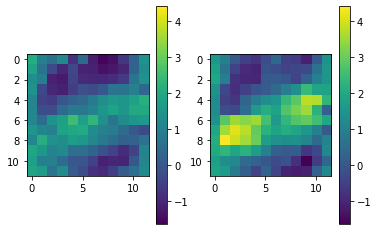

In [4]:
fig,ax = plt.subplots(1,2)
agt = agt0
for i in range(2):
    vmin = np.min(agt.Qtab)
    vmax = np.max(agt.Qtab)
    img = ax[i].imshow(agt.Qtab[:,i].reshape(12,12),vmin=vmin,vmax=vmax)
    fig.colorbar(img,ax=ax[i])

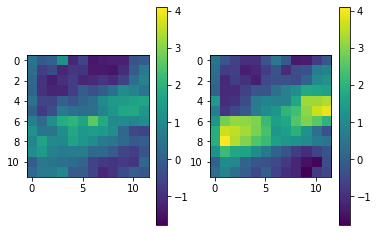

In [5]:
fig,ax = plt.subplots(1,2)
agt = agt1
for i in range(2):
    vmin = np.min(agt.Qtab)
    vmax = np.max(agt.Qtab)
    img = ax[i].imshow(agt.Qtab[:,i].reshape(12,12),vmin=vmin,vmax=vmax)
    fig.colorbar(img,ax=ax[i])

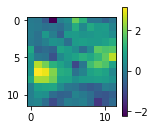

In [6]:
plt.figure(figsize=(2,2))
plt.imshow((agt.Qtab[:,1]-agt.Qtab[:,0]).reshape(12,12))
plt.colorbar();

In [27]:
dict_names = [
    # First worm
    'Data/traj12-11-2020_19-04-41.pkl', #none
    'Data/traj12-11-2020_19-14-38.pkl', #none
    'Data/traj12-11-2020_19-24-30.pkl', #xlim 800
    'Data/traj12-11-2020_19-35-31.pkl', #none # Seems like an especially bad dataset. Actually ruined all the others

    # Second worm
    'Data/traj12-11-2020_19-55-19.pkl', #none
    'Data/traj12-11-2020_20-05-11.pkl', #none
    'Data/traj12-11-2020_20-15-17.pkl', #none
    'Data/traj12-11-2020_20-25-06.pkl', #xlim 1430

    # Third worm
    'Data/traj30-10-2020_18-14-00.pkl', #none
    'Data/traj30-10-2020_18-34-10.pkl', #none

    # Fourth worm
    'Data/traj02-11-2020_15-53-56.pkl', #none 
    'Data/traj02-11-2020_16-14-45.pkl', #none 

    # Fifth worm
    'Data/traj03-11-2020_14-46-45.pkl', #none
    'Data/traj03-11-2020_15-08-07.pkl', #none
]
dict_names = ['./../10_30_model/'+dn for dn in dict_names]

dh = mba.DataHandler()
dh.add_dict_to_df(dict_names, 
                 reward_ahead=10,
                 timestep_gap=1,
                 prev_act_window=3,
                 jump_limit=100)
#dh.save_dfs('noprocs.pkl')

In [2]:
dh = mba.DataHandler()
dh.load_df('noprocs.pkl')

1. Multiple models, individual agents
2. Multiple models, agent seeds
3. One model, agent seeds

In [7]:
def test_agents(Qtab):
    # Evaluation learner
    agt = tab.Q_Alpha_Agent(gamma=.25,epsilon=0.01,alpha=0.01) 
        # The HPs shouldn't be used
    agt.Qtab = Qtab
    test_lnr = mba.Learner(agt, 'test_learner', worm_pars={'num_models':1,'frac':1},num_steps=1000,eval_steps=5000)
    dh = mba.DataHandler()
    dh.load_df('noprocs.pkl')
    test_lnr.make_mod_and_env(dh)
    return lnr.eval()

def plot_qtabs(agt,vmin=None,vmax=None):
    fig,ax = plt.subplots(1,2)
    for i in range(2):
        img = ax[i].imshow(agt.Qtab[:,i].reshape(12,12),vmin=vmin,vmax=vmax)
        fig.colorbar(img,ax=ax[i])

## 1. Multiple models, individual agents and then averaged.

In [15]:
agts = []
agts.append(tab.Q_Alpha_Agent(
    gamma=0,
    epsilon=0.01,
    alpha=0.01,))
lnr = mba.Learner(agts[0],'noprocs',
                 worm_pars={'num_models':1,'frac':1},
                 num_steps=1000,
                 eval_steps=1000)
lnr.make_mod_and_env(dh)
eval_r = np.mean([lnr.eval_ep() for i in range(50)])

On model 0


In [16]:
eval_r

0.0577512284514167

In [17]:
evals = []
for i in range(20):
    print(i)
    Qtab = lnr.learn(dh,learn_limit=1000)
    evals.append(np.mean([lnr.eval_ep() for i in range(50)]))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


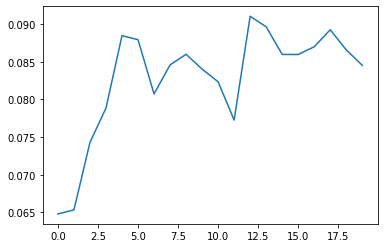

In [6]:
plt.plot(evals) #gamma .98, ep .01, alpha .01
# started at .071

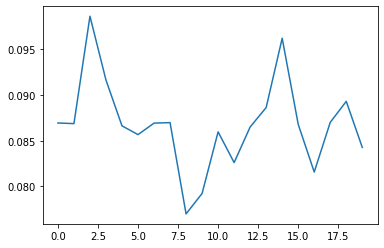

In [21]:
plt.plot(evals) #gamma 0, ep .01, alpha .01
# started at .061

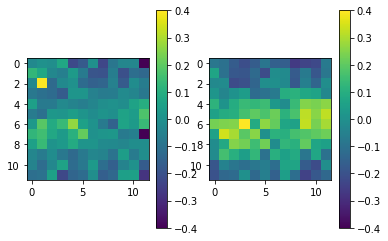

In [24]:
plot_qtabs(agts[0],vmin=-.4,vmax=.4)

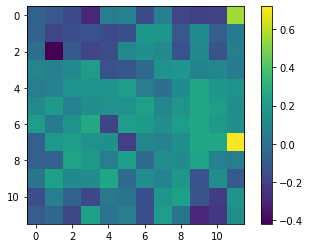

In [25]:
plt.imshow((agts[0].Qtab[:,1]-agts[0].Qtab[:,0]).reshape(12,12))
plt.colorbar();

In [26]:
def test_model(lnr):
    # Tests det, random, known, on/off policies with a learner.
    def det_pol(stt):
        if stt==-1:
            return 1
        else:
            return 0
    def rand_pol(stt):
        return np.random.choice(2)
    def on_pol(stt):
        return 1
    def off_pol(stt):
        return 0

    def check_w_pol(lnr,pol):
        # Checking model
        rews = []
        act=0
        for n in range(100000):
            obs,r,done,_ = lnr.env.step(act)
            rews.append(r)
            obs = lnr.env.obs2grid(obs)
            stt = np.sign(obs[0]*obs[1])
            act = pol(stt)
        return np.mean(np.array(rews))
    on_rew = check_w_pol(lnr,on_pol)
    off_rew = check_w_pol(lnr,off_pol)
    rand_rew = check_w_pol(lnr,rand_pol)
    det_rew = check_w_pol(lnr,det_pol)
    print(f'On: {on_rew}, Off: {off_rew},\nRand: {rand_rew}, Det: {det_rew}')

In [28]:
test_model(lnr) # lookahead 10, gap 1, prev 3

On: 0.08135043261924636, Off: 0.044970375586748094,
Rand: 0.06009907475070151, Det: 0.058904984855335935
